In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart_2022_no_nans.csv')

In [4]:
# Cutting down to only the relevant columns

data = data[['State', 'GeneralHealth', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers']]
data.head()

,State,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,SmokerStatus,ECigaretteUsage,AgeCategory,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Very good,Yes,9.0,No,No,No,No,No,No,...,Yes,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Age 65 to 69,71.67,27.99,No
1,Alabama,Very good,Yes,6.0,No,No,No,No,No,No,...,Yes,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Age 70 to 74,95.25,30.13,No
2,Alabama,Very good,No,8.0,No,No,No,No,No,No,...,Yes,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,Age 75 to 79,108.86,31.66,Yes
3,Alabama,Fair,Yes,9.0,No,No,No,No,Yes,No,...,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 80 or older,90.72,31.32,No
4,Alabama,Good,Yes,5.0,No,No,No,No,No,No,...,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Age 80 or older,79.38,33.07,No


Do "healthier" (physical activity, good general health, +8 sleep hours, etc.) states see a lower amount of heart attacks/angina compared to states that are "less healthy"?

Relevant columns for question
- State
- GeneralHealth
    - Excellent
    - Very good
    - Good
    - Fair
    - Poor
- PhysicalActivities
    - Yes
    - No
- SleepHours
    - Number
- HadHeartAttack
    - Yes
    - No
- HadAngina
    - Yes
    - No
- SmokerStatus
    - Former smoker
    - Never smoked
    - Current smoker
- AlcoholDrinkers
    - Yes
    - No

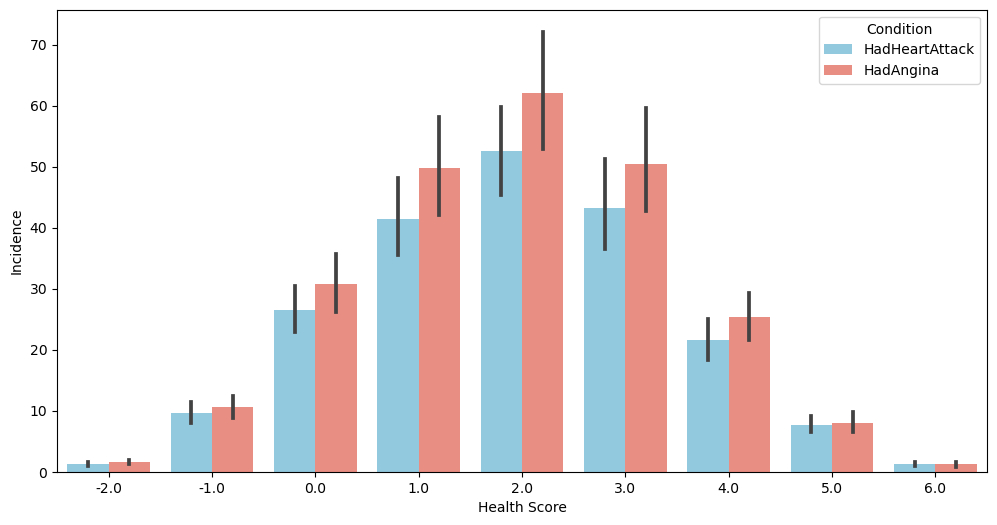

In [7]:
# Creating a composite health score based on the dataset's columns
data['HealthScore'] = (
    data['GeneralHealth'].map({'Excellent': 2, 'Very good': 1, 'Good': 0, 'Fair': -1, 'Poor': -2}) +
    data['PhysicalActivities'].map({'Yes': 1, 'No': 0}) +
    (data['SleepHours'] >= 8).astype(int) +
    data['SmokerStatus'].map({'Never smoked': 1, 'Former smoker': 0, 'Current smoker': -1}) +
    data['AlcoholDrinkers'].map({'No': 1, 'Yes': 0})
)

# Calculating incidence of heart attacks/angina for each health score
grouped_data = data.groupby(['State', 'HealthScore']).agg({
    'HadHeartAttack': lambda x: (x == 'Yes').sum(),
    'HadAngina': lambda x: (x == 'Yes').sum()
}).reset_index()

# Melting the DataFrame to combine 'HadHeartAttack' and 'HadAngina' into a single column
melted_data = pd.melt(grouped_data, id_vars=['State', 'HealthScore'], value_vars=['HadHeartAttack', 'HadAngina'],
                      var_name='Condition', value_name='Incidence')

# Visualizing the relationship between health score and heart attacks/angina
plt.figure(figsize=(12, 6))
sns.barplot(x='HealthScore', y='Incidence', hue='Condition', data=melted_data, palette={'HadHeartAttack': 'skyblue', 'HadAngina': 'salmon'})
plt.xlabel('Health Score')
plt.ylabel('Incidence')
plt.legend(title='Condition')

In [8]:
# Grouping by STATES and calculating incidence of heart attacks/angina for each state
grouped_states_data = data.groupby('State').agg({
    'HealthScore': 'sum',  # Using sum to aggregate health scores
    'HadHeartAttack': lambda x: (x == 'Yes').sum(),
    'HadAngina': lambda x: (x == 'Yes').sum()
}).reset_index()

# Sorting the states by health score from most healthy to least healthy
grouped_states_data = grouped_states_data.sort_values(by='HealthScore', ascending=False)

grouped_states_data

,State,HealthScore,HadHeartAttack,HadAngina
50,Washington,39305.0,701,822
24,Minnesota,23594.0,396,488
21,Maryland,23299.0,496,567
33,New York,21925.0,416,511
36,Ohio,20909.0,589,663
45,Texas,17732.0,426,450
9,Florida,17506.0,557,618
46,Utah,16818.0,227,222
17,Kansas,15254.0,331,380
20,Maine,15226.0,425,434


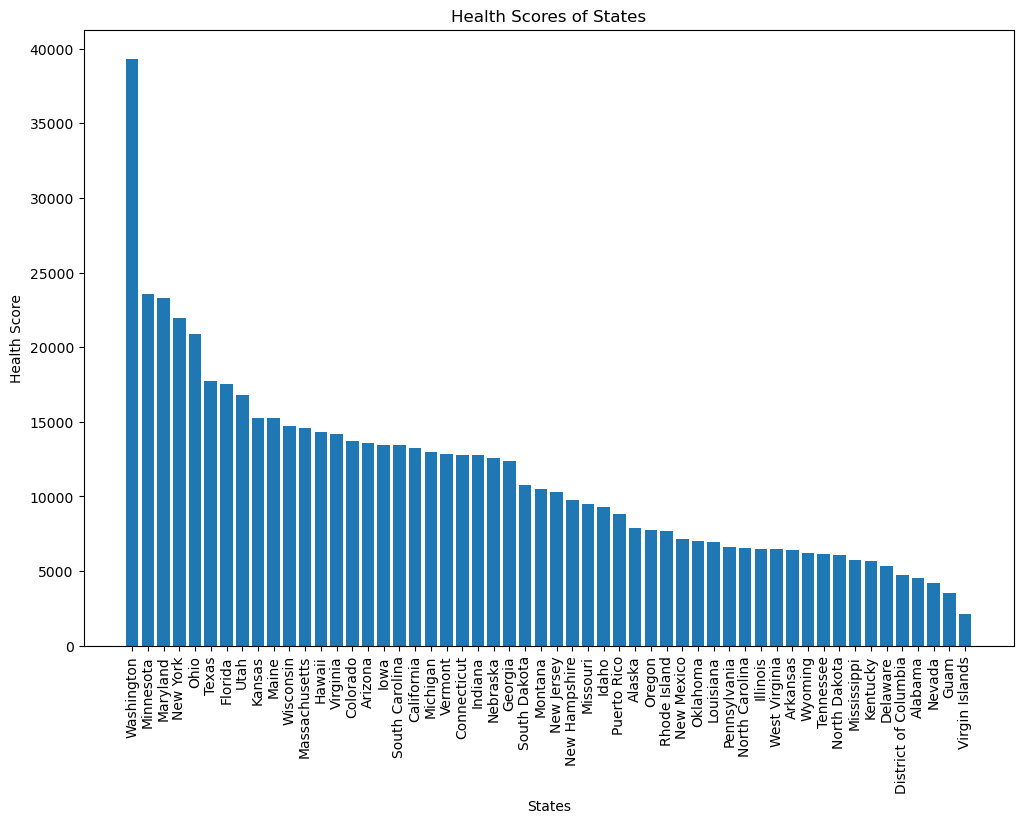

In [24]:
# Plotting a bar chart for health scores of each state

plt.figure(figsize=(12, 8))
plt.bar(grouped_states_data['State'], grouped_states_data['HealthScore'])
plt.title('Health Scores of States')
plt.xlabel('States')
plt.ylabel('Health Score')
plt.xticks(rotation=90)
plt.show()

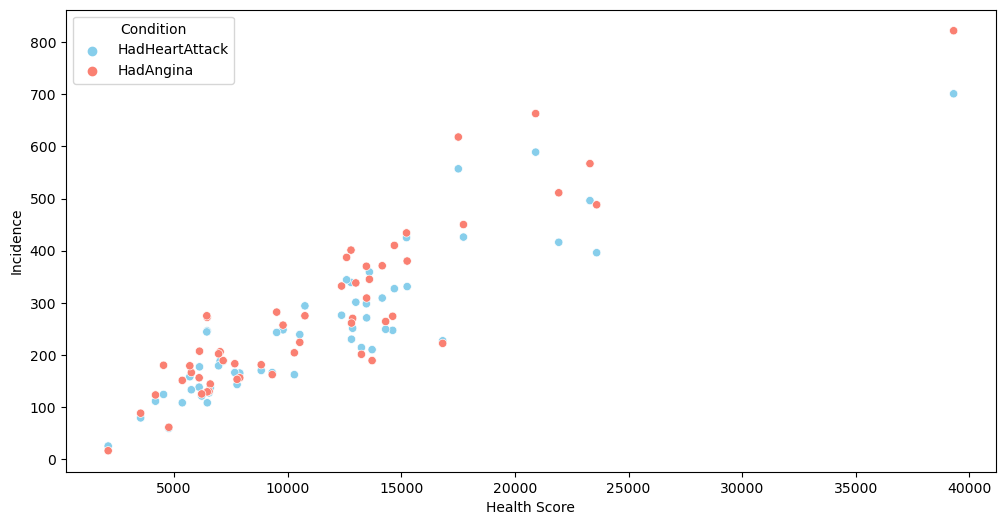

In [6]:
# Scatterplot to visualize the relationship between health score and heart attacks/angina

melted_data_2 = pd.melt(grouped_states_data, id_vars=['State', 'HealthScore'], value_vars=['HadHeartAttack', 'HadAngina'],
                      var_name='Condition', value_name='Incidence')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='HealthScore', y='Incidence', hue='Condition', data=melted_data_2, palette={'HadHeartAttack': 'skyblue', 'HadAngina': 'salmon'}, marker='o')
plt.xlabel('Health Score')
plt.ylabel('Incidence')
plt.legend(title='Condition')
plt.show()

In [7]:
# Grouping by states and calculating total overall health score for each state
state_health_totals = data.groupby('State')['HealthScore'].sum().reset_index()

most_healthy_state = state_health_totals.loc[state_health_totals['HealthScore'].idxmax()]['State']
least_healthy_state = state_health_totals.loc[state_health_totals['HealthScore'].idxmin()]['State']

most_healthy_data = data[data['State'] == most_healthy_state]
least_healthy_data = data[data['State'] == least_healthy_state]

state_population = data.groupby('State')['State'].count()

most_healthy_ha_percentage = (most_healthy_data['HadHeartAttack'].eq('Yes').sum() / state_population[most_healthy_state]) * 100
most_healthy_angina_percentage = (most_healthy_data['HadAngina'].eq('Yes').sum() / state_population[most_healthy_state]) * 100

least_healthy_ha_percentage = (least_healthy_data['HadHeartAttack'].eq('Yes').sum() / state_population[least_healthy_state]) * 100
least_healthy_angina_percentage = (least_healthy_data['HadAngina'].eq('Yes').sum() / state_population[least_healthy_state]) * 100

print(f"Most Healthy State: {most_healthy_state}")
print(f"Total Population: {state_population[most_healthy_state]}")
print(f"Percentage with Heart Attacks: {most_healthy_ha_percentage:.2f}%")
print(f"Percentage with Angina: {most_healthy_angina_percentage:.2f}%")
print("\n")
print(f"Least Healthy State: {least_healthy_state}")
print(f"Total Population: {state_population[least_healthy_state]}")
print(f"Percentage with Heart Attacks: {least_healthy_ha_percentage:.2f}%")
print(f"Percentage with Angina: {least_healthy_angina_percentage:.2f}%")

Most Healthy State: Washington
Total Population: 15000
Percentage with Heart Attacks: 4.67%
Percentage with Angina: 5.48%


Least Healthy State: Virgin Islands
Total Population: 743
Percentage with Heart Attacks: 3.36%
Percentage with Angina: 2.15%


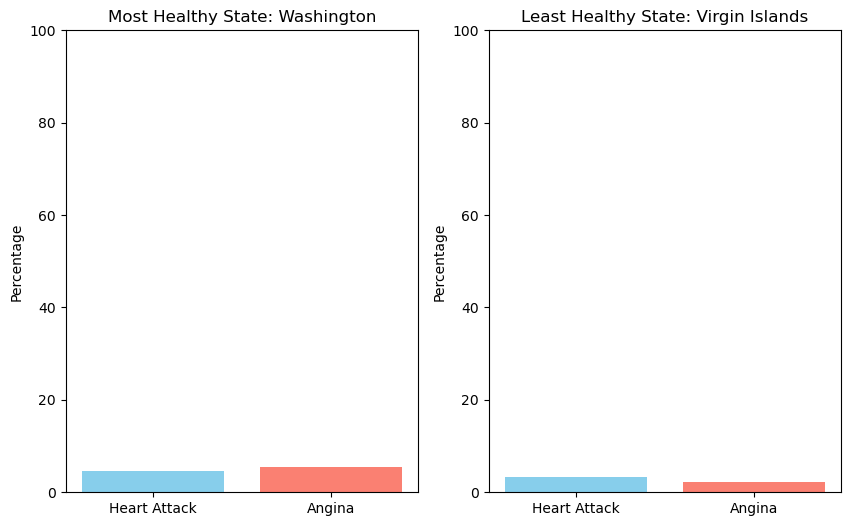

In [8]:
# Healthiest state
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Heart Attack', 'Angina'], [most_healthy_ha_percentage, most_healthy_angina_percentage], color=['skyblue', 'salmon'])
plt.title(f'Most Healthy State: {most_healthy_state}')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Least healthiest state
plt.subplot(1, 2, 2)
plt.bar(['Heart Attack', 'Angina'], [least_healthy_ha_percentage, least_healthy_angina_percentage], color=['skyblue', 'salmon'])
plt.title(f'Least Healthy State: {least_healthy_state}')
plt.ylabel('Percentage')
plt.ylim(0, 100)

plt.show()

In [9]:
state_health_totals = state_health_totals.sort_values(by='HealthScore', ascending=False)

second_healthiest_state = state_health_totals.iloc[1]['State']
second_least_healthy_state = state_health_totals.iloc[-2]['State']

second_healthiest_data = data[data['State'] == second_healthiest_state]
second_least_healthy_data = data[data['State'] == second_least_healthy_state]

state_population = data.groupby('State')['State'].count()

second_healthiest_ha_percentage = (second_healthiest_data['HadHeartAttack'].eq('Yes').sum() / state_population[second_healthiest_state]) * 100
second_healthiest_angina_percentage = (second_healthiest_data['HadAngina'].eq('Yes').sum() / state_population[second_healthiest_state]) * 100

second_least_healthy_ha_percentage = (second_least_healthy_data['HadHeartAttack'].eq('Yes').sum() / state_population[second_least_healthy_state]) * 100
second_least_healthy_angina_percentage = (second_least_healthy_data['HadAngina'].eq('Yes').sum() / state_population[second_least_healthy_state]) * 100

print(f"Second Healthiest State: {second_healthiest_state}")
print(f"Total Population: {state_population[second_healthiest_state]}")
print(f"Percentage with Heart Attacks: {second_healthiest_ha_percentage:.2f}%")
print(f"Percentage with Angina: {second_healthiest_angina_percentage:.2f}%")
print("\n")
print(f"Second Least Healthy State: {second_least_healthy_state}")
print(f"Total Population: {state_population[second_least_healthy_state]}")
print(f"Percentage with Heart Attacks: {second_least_healthy_ha_percentage:.2f}%")
print(f"Percentage with Angina: {second_least_healthy_angina_percentage:.2f}%")

Second Healthiest State: Minnesota
Total Population: 9161
Percentage with Heart Attacks: 4.32%
Percentage with Angina: 5.33%


Second Least Healthy State: Guam
Total Population: 1549
Percentage with Heart Attacks: 5.10%
Percentage with Angina: 5.68%


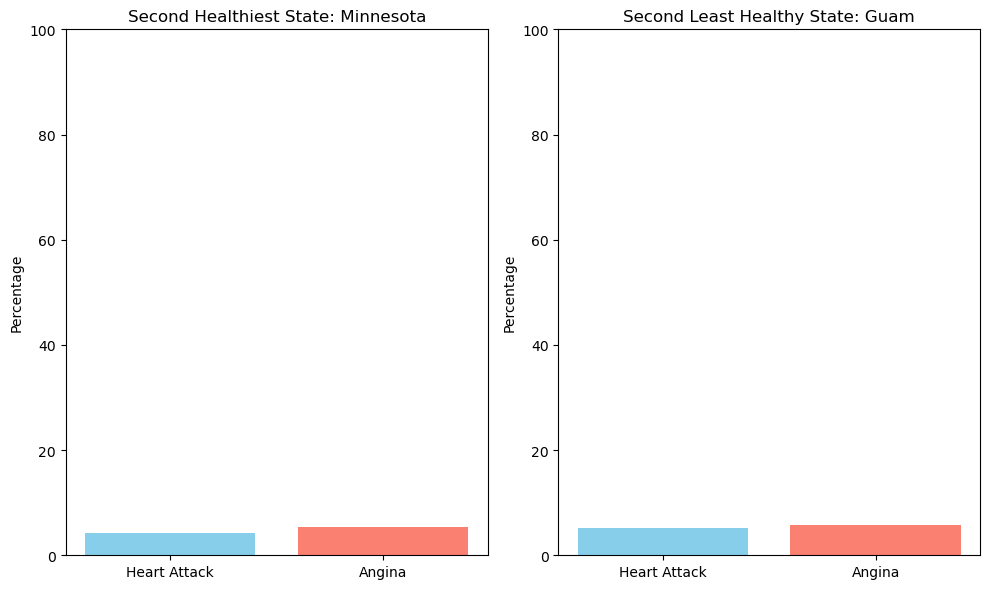

In [10]:
# Second healthiest state
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Heart Attack', 'Angina'], [second_healthiest_ha_percentage, second_healthiest_angina_percentage], color=['skyblue', 'salmon'])
plt.title(f'Second Healthiest State: {second_healthiest_state}')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Second least healthiest state
plt.subplot(1, 2, 2)
plt.bar(['Heart Attack', 'Angina'], [second_least_healthy_ha_percentage, second_least_healthy_angina_percentage], color=['skyblue', 'salmon'])
plt.title(f'Second Least Healthy State: {second_least_healthy_state}')
plt.ylabel('Percentage')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()